In [1]:
scale = 0.08
W = int(1920*scale)
H = int(1080*scale)

In [2]:
print(W)
print(H)

153
86


In [3]:
from moviepy.editor import VideoFileClip
import cv2
import numpy as np

# Load the video
video_path = 'data/y2mate.is - Topdown water moving to up left-g2P2ni2yN4o-1080pp-1711844452.mp4'
video = VideoFileClip(video_path)

# Parameters for frame extraction
fps = video.fps  # Frames per second
duration = video.duration  # Duration in seconds to extract frames from
n_frames = int(fps * duration)  # Total frames to extract based on duration

# Function to process frames: convert to grayscale and resize
def process_frame(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    frame_resized = cv2.resize(frame_gray, (W, H))  # Resize to reduce computation
    return frame_resized

# Extract and process frames
processed_frames = []
for i in range(n_frames):
    frame = video.get_frame(i/fps)
    processed_frame = process_frame(frame)
    processed_frames.append(processed_frame)

# Convert to a numpy array for further processing
processed_frames_array = np.array(processed_frames)

# Display the shape of the processed frames array to verify
processed_frames_array.shape


(711, 86, 153)

In [4]:
processed_frames_array.shape[0]

711

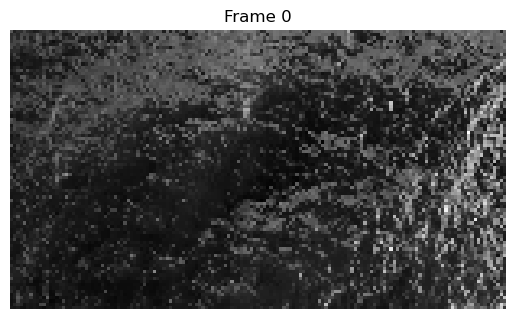

In [5]:
import matplotlib.pyplot as plt

# Assuming processed_frames_array is your array of processed video frames
# Display the first frame
plt.imshow(processed_frames_array[0], cmap='gray')
plt.title('Frame 0')
plt.axis('off')  # Hide the axis to focus on the image
plt.show()

In [6]:
# Assuming shape (frames, H, W)
# Flatten each frame
flattened_frames = processed_frames_array.reshape(processed_frames_array.shape[0], -1)
# Now flattened_frames should have the shape (frames, HW), ready to be fed into the model
# Normalization
flattened_frames = flattened_frames / 255.0

flattened_frames.shape

(711, 13158)

In [7]:
# Calculate the indices for each split
train_end = int(n_frames * 0.6)
validate_end = train_end + int(n_frames * 0.2)
A = train_end
B = validate_end-train_end
print('A = train_end = ', A)
print('B = validate_end = ', B)

# Split the data
train_data = flattened_frames[:train_end]
validate_data = flattened_frames[train_end:validate_end]
test_data = flattened_frames[validate_end:]

# Check the shape of each set
print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", validate_data.shape)
print("Testing Data Shape:", test_data.shape)

A = train_end =  426
B = validate_end =  142
Training Data Shape: (426, 13158)
Validation Data Shape: (142, 13158)
Testing Data Shape: (143, 13158)


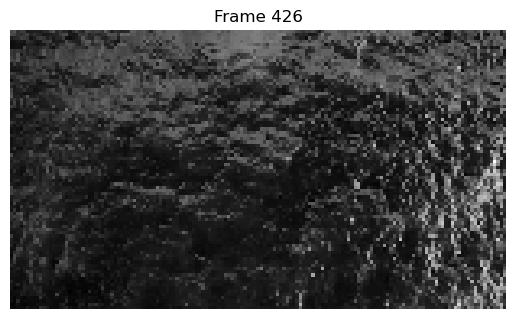

In [8]:
plt.imshow(processed_frames_array[A-1], cmap='gray')
plt.title('Frame '+str(A))
plt.axis('off')  # Hide the axis to focus on the image
plt.show()

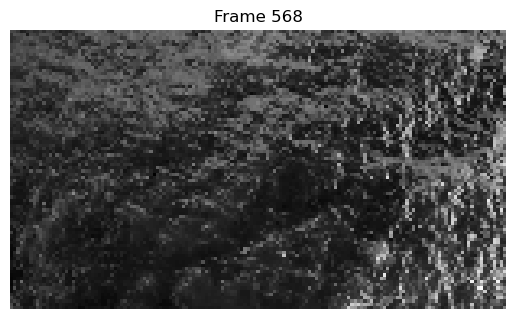

In [9]:
plt.imshow(processed_frames_array[A+B-1], cmap='gray')
plt.title('Frame '+str(A+B))
plt.axis('off')  # Hide the axis to focus on the image
plt.show()

In [10]:
import torch
torch.cuda.empty_cache()
np.random.seed(42)

In [11]:
from fourier_koopman import fourier
f = fourier(num_freqs=40)
train_losses = f.fit(train_data, iterations = 1000,verbose=True)

0.00043716459513040045
0.00043716459475380857
0.00043716459437721675
0.0004371645940006249
0.00043716459362403304
0.0004371645932474413
0.00043716459287084967
0.0004371645924942579
0.0004371645921176663
0.00043716459174107463
0.000437164591364483
0.0004371645909878914
0.00043716459061129997
0.0004371645902347084
0.0004371645898581169
0.0004371645894815254
0.0004371645891049342
0.0004371645887283428
0.00043716458835175157
0.0004371645879751603
0.00043716458759856906
0.00043716458722197783
0.0004371645868453867
0.00043716458646879565
0.0004371645860922046
0.00043716458571561347
0.0004371645853390224
0.0004371645849624315
0.0004371645845858405
0.00043716458420924953
0.00043716458383265874
0.0004371645834560679
0.00043716458307947704
0.0004371645827028863
0.0004371645823262955
0.00043716458194970477
0.0004371645815731141
0.0004371645811965234
0.00043716458081993287
0.0004371645804433423
0.00043716458006675177
0.00043716457969016136
0.00043716457931357094
0.00043716457893698047
0.0004371645

In [12]:
train_losses

[array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),
 array(0.00043716),


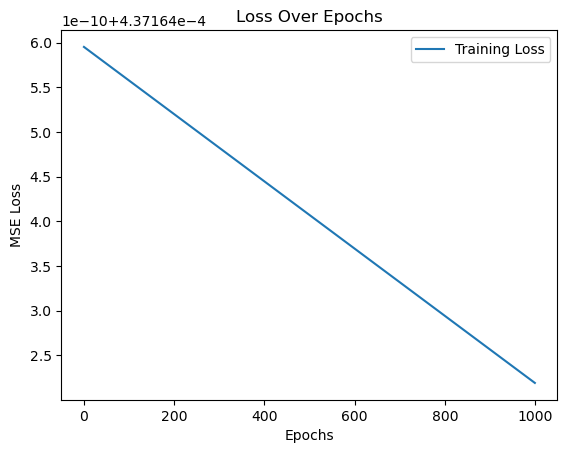

In [13]:
# Plotting training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

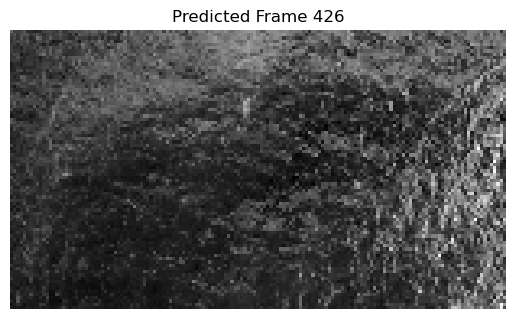

In [14]:
xhat_fourier = f.predict(A-1)

# Inverse normalization
xhat_fourier = xhat_fourier * 255.0
first_predicted_frame = xhat_fourier[0].reshape(H, W)
plt.imshow(first_predicted_frame, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title('Predicted Frame '+str(A))
plt.axis('off')  # Hide axes for better visualization
plt.show()

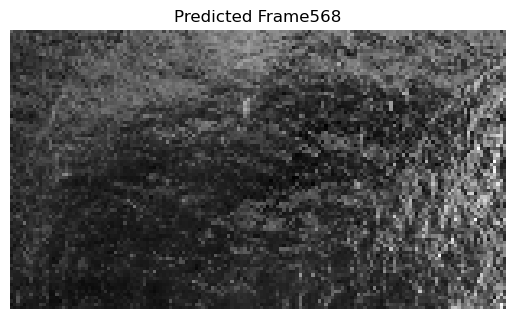

In [15]:
# Predict the next frames, e.g., predicting the next B frames
xhat_fourier = f.predict(A+B-1)

# Inverse normalization
xhat_fourier = xhat_fourier * 255.0
# xhat_koopan contains the predicted frames from A to A+B, reshaped back to their original dimension
first_predicted_frame = xhat_fourier[0].reshape(H, W)
# Display the first predicted frame
plt.imshow(first_predicted_frame, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title('Predicted Frame'+str(A+B))
plt.axis('off')  # Hide axes for better visualization
plt.show()

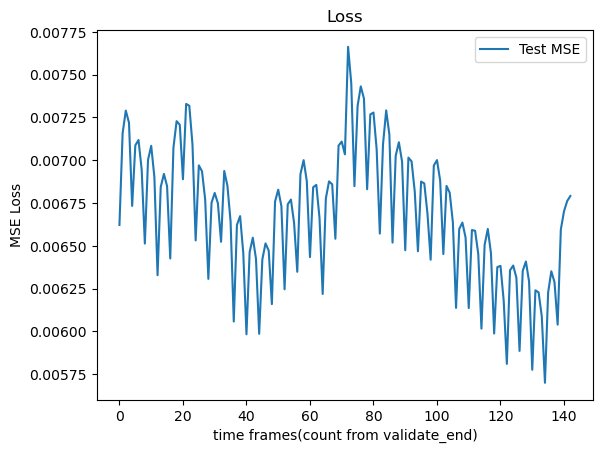

In [16]:
#Test Metrics
xhat_fourier = f.predict(n_frames) 
#should be in shape (frames, HW)
test_mse = np.mean((xhat_fourier[validate_end:]-test_data)**2, axis=1)

# Plotting loss
plt.plot(test_mse, label='Test MSE')
plt.xlabel('time frames(count from validate_end)')
plt.ylabel('MSE Loss')
plt.title('Loss')
plt.legend()
plt.show()

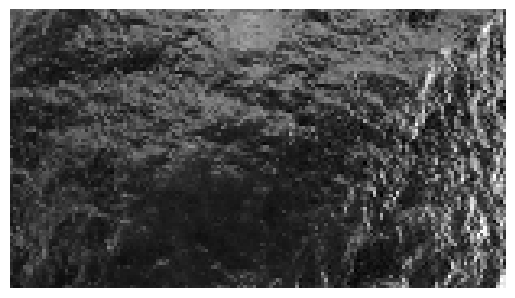

In [17]:
from matplotlib.animation import FuncAnimation

# Function to update the plot with the next predicted frame
def update_frame(i, frames, plot):
    plot.set_data(frames[i])
    return plot,

# Reshape all predicted frames back to their original 2D shape
xhat_fourier = xhat_fourier * 255.0
predicted_frames_2d = xhat_fourier.reshape(-1, H, W)

fig, ax = plt.subplots()
plot = plt.imshow(predicted_frames_2d[0], cmap='gray', animated=True)
plt.axis('off')

ani = FuncAnimation(fig, update_frame, frames=len(predicted_frames_2d), fargs=(predicted_frames_2d, plot), blit=True, interval=fps)
ani.save('animation_xhat_fourier.mp4')
plt.show()